In [16]:
import sys
sys.path.append("../script/")

from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import importlib
from time import time
import Functions
from matplotlib import pyplot as plt


In [17]:
# ref from 2segp github
# Classification dataset names - choose from following datasets 

CLASS_DATASET_NAMES = ['bcw','heart','iono','parks','sonar']
dataset_name = CLASS_DATASET_NAMES[0]

# Load the dataset
Xy = np.genfromtxt('test_data/'+dataset_name+'.csv', delimiter=',')
X = Xy[:, :-1]
y = Xy[:, -1]   # last column is the label

# simple operators
boost_num = 1000

seed = np.random.randint(9999999)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Data

In [18]:
df = pd.read_csv('test_data/simple_line.csv')
df['z'] = df['z'].replace('a',0)
df['z'] = df['z'].replace('b',1)

data = df.to_numpy()
X = data[:,:-1]
x = data[:,0]
y = data[:,1]

label = data[:,-1]

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

i = label == 0

ax = data[i][:,0]
ay = data[i][:,1]

i = label == 1
bx = data[i][:,0]
by = data[i][:,1]

In [19]:
n = 10000

i = 5
j = 2

x = np.random.random(n)
y = np.random.random(n)

X = np.array([x,y]).T
label = y < i*x**j

index = y > (i*x**j + 0.1)
ax = x[index]
ay = y[index]

index = y < (i*x**j - 0.1)
bx = x[index]
by = y[index]


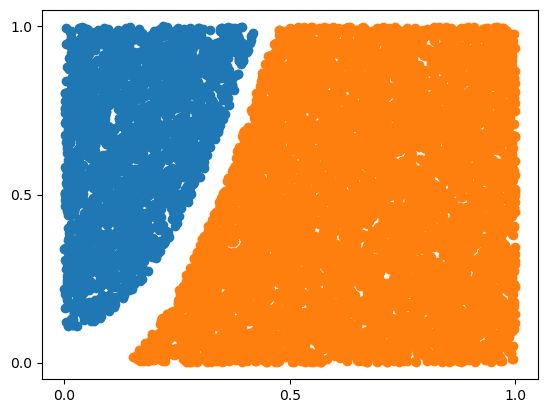

In [20]:
plt.scatter(ax,ay)
plt.scatter(bx,by)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
plt.show()

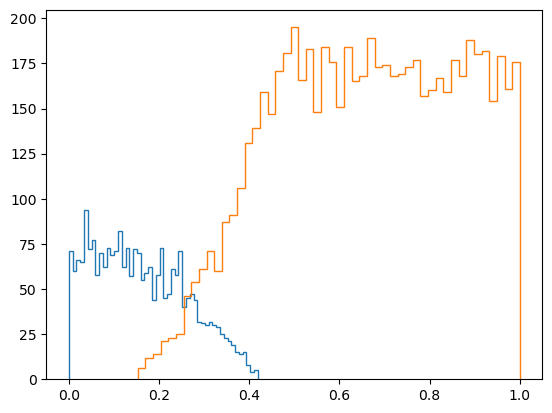

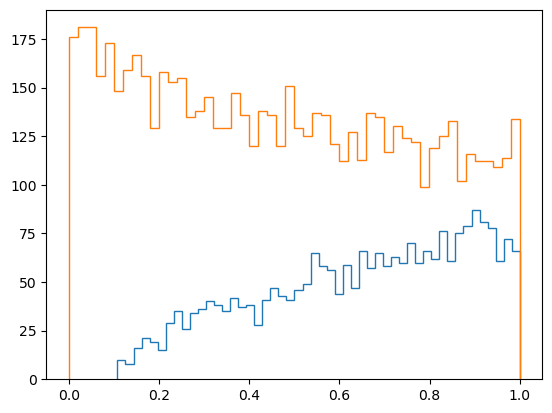

In [21]:
plt.hist(ax,bins=50,histtype='step')
plt.hist(bx,bins=50,histtype='step')
plt.show()

plt.hist(ay,bins=50,histtype='step')
plt.hist(by,bins=50,histtype='step')
plt.show()

In [ ]:
# ref from 2segp github
# Classification dataset names - choose from following datasets 

CLASS_DATASET_NAMES = ['bcw','heart','iono','parks','sonar']
dataset_name = CLASS_DATASET_NAMES[1]


# Load the dataset
Xy = np.genfromtxt('test_data/'+dataset_name+'.csv', delimiter=',')
X = Xy[:, :-1]
y = Xy[:, -1]   # last column is the label

# simple operators

boost_num = 1000

seed = np.random.randint(9999999)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Test

In [22]:
def calculate_fitness(val,label):
    df = pd.DataFrame(val,columns=['value'])
    df['label'] = label

    items = df.value_counts(sort=False).iteritems()
    (pv,pl),pc = next(items)

    columns = []

    col = [pv,pl,0,[0,0,0]]
    col[3][pl] = pc
    col[-2] += 1
    swtich = 0

    for (v,l),c in items:
        if v != pv:
            columns.append(col)        
            col = [v,-1,0,[0,0,0]]
        col[3][l] = c
        if max(col[3]) == c:
            col[1] = l
        col[-2] += 1
        pv = v

    columns.append(col)

    bins = []
    bin = columns[0][:3]
    counts = []
    count = columns[0][3]

    for i in range(1,len(columns)):
        col = columns[i]
        
        if (col[1] != bin[1]) or ((bin[2] == 1) != (col[2] == 1)):
            bin[0] = (bin[0]+col[0])/2
            bins.append(bin)
            counts.append(count)
            
            bin = col[:3]
            count = col[3]
        else:
            for i in range(3):
                count[i] += col[3][i]
                bin[0] = col[0]
    bin[0] = np.inf
    bins.append(bin)
    counts.append(count)

    bins = np.array(bins)
    counts = np.array(counts)
    
    return bins,counts

5 : 3892 10000.0 2.5693730729701953 1.0


C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


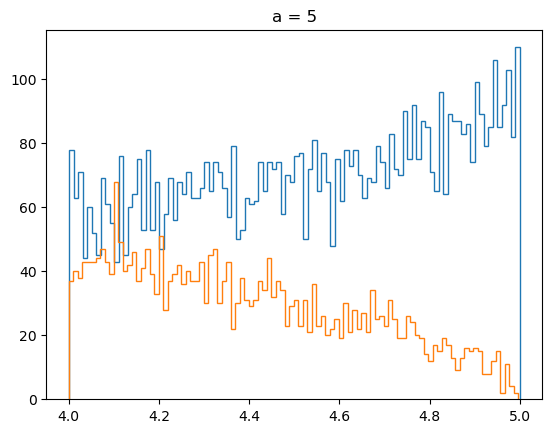

C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


5 : 518 10000.0 19.305019305019304 1.0


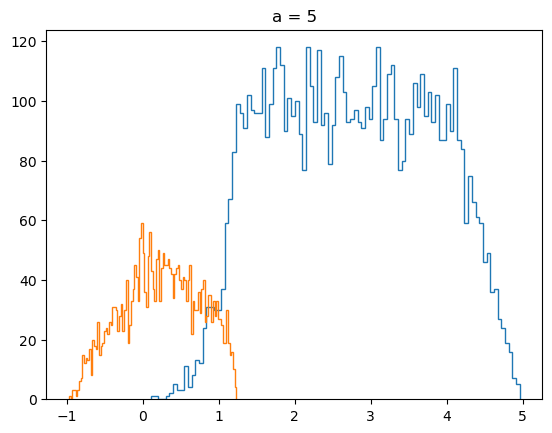

C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


5 : 2 10000.0 5000.0 1.0


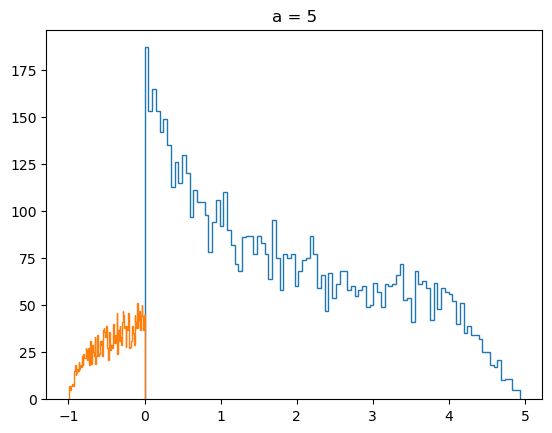

5 : 1054 10000.0 9.487666034155598 1.0


C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


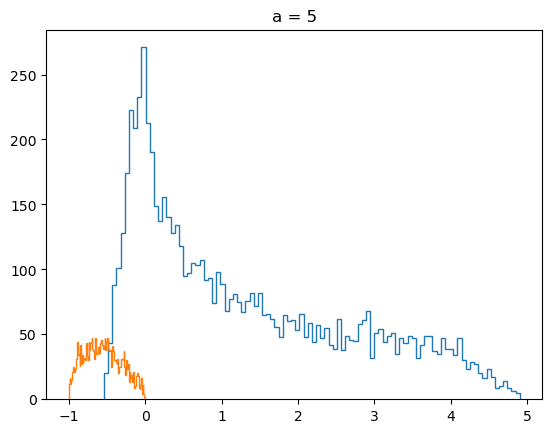

C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


5 : 1768 10000.0 5.656108597285068 1.0


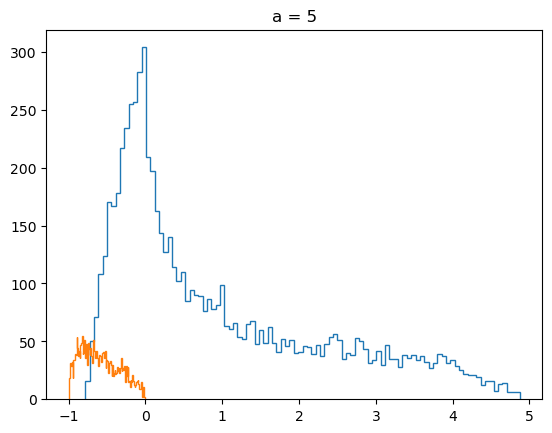

5 : 2230 10000.0 4.484304932735426 1.0


C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


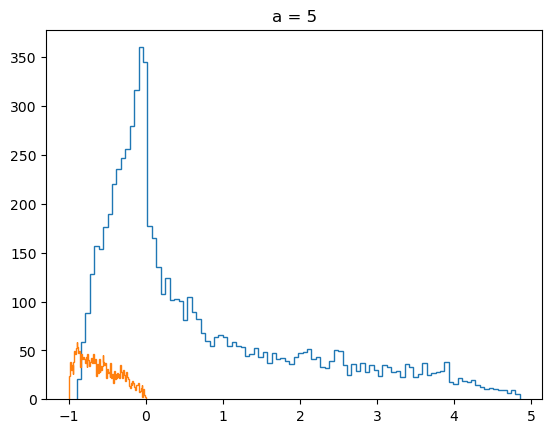

5 : 2558 10000.0 3.9093041438623923 1.0


C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


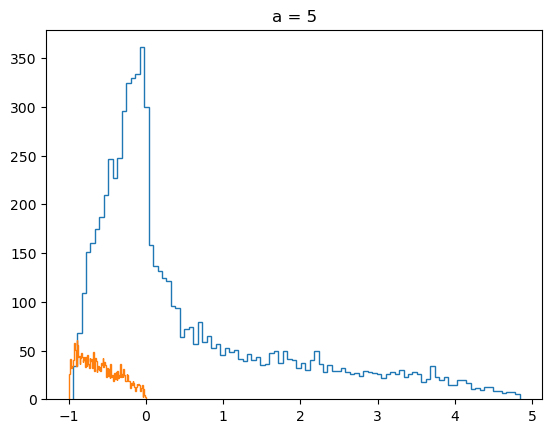

C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


5 : 2788 10000.0 3.586800573888092 1.0


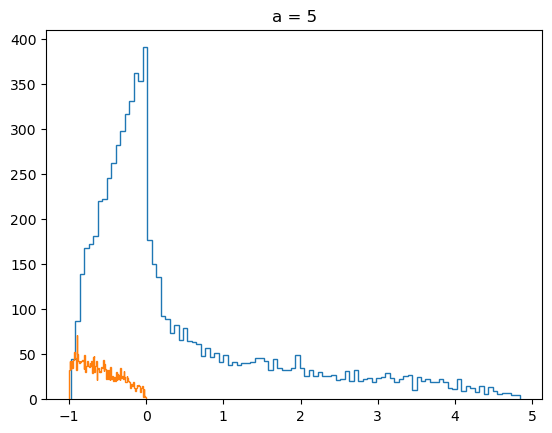

5 : 2972 10000.0 3.3647375504710633 1.0


C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


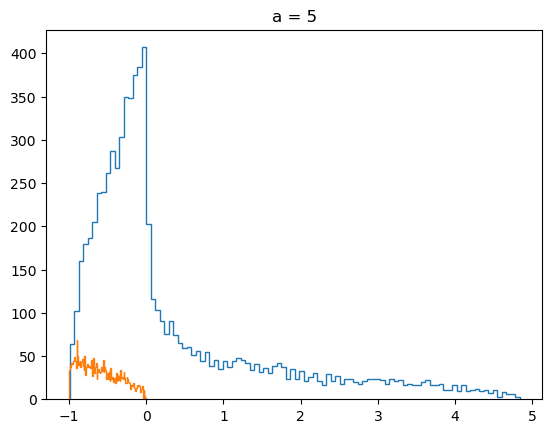

5 : 3086 10000.0 3.240440699935191 1.0


C:\Users\zhouz\AppData\Local\Temp\ipykernel_14172\181242945.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  items = df.value_counts(sort=False).iteritems()


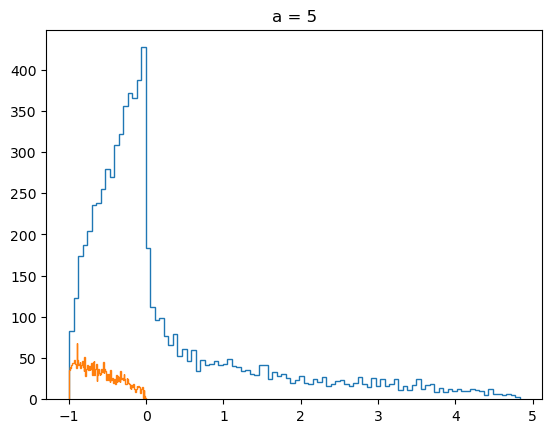

In [23]:
a = i
b = j

for b in range(10):
    # val = i*x**j +x - y
    val = a*x**b - y
    av = val[label==True]
    bv = val[label==False]
    
    bins,counts = calculate_fitness(val,label)

    total = counts.sum(axis=1)
    gini = np.sum((counts.T/total)**2,axis=0)
    fitness = np.sum(gini * total)
    print(a,":",len(bins),fitness,fitness/len(bins),fitness/sum(total))
    
    plt.hist(av,bins=100,histtype='step')
    plt.hist(bv,bins=100,histtype='step')
    plt.title("a = "+str(a))
    plt.show()

In [24]:
pd.value_counts(X_train[0])

16.110000      1
18.050000      1
0.279200       1
0.121600       1
0.280200       1
0.223600       1
0.131400       1
1233.000000    1
129.000000     1
25.270000      1
19.920000      1
0.003434       1
0.018750       1
0.011670       1
0.030670       1
0.019380       1
0.006770       1
74.080000      1
4.533000       1
1.332000       1
0.704900       1
0.062480       1
0.186100       1
0.059430       1
0.094470       1
0.113700       1
0.097210       1
813.000000     1
105.100000     1
0.081580       1
dtype: int64

# Engine

In [25]:
import numpy as np
import pandas as pd
from time import time
from Node import Node

In [13]:
class Engine:
    def __init__(self,opset,X,Y,log_odds,p,learning_rate):
        self.generation = 0
#         self.X_train,self.X_valid,self.y_train,self.y_valid = train_test_split(X,Y,train_size=0.9)
        X = X.astype('float64')
        Y = Y.astype('int')
        self.opset = opset
        
        self.num_class = len(pd.unique(Y))
        self.feature_space = X.shape[1]
        
        self.vals = X.T
        self.X = X
        self.Y = Y

        self.log_odds = log_odds
        self.p = p
        self.residual = self.Y - p
        self.learning_rate = learning_rate

        self.count_label = pd.value_counts(Y).reset_index().values
        
        self.best = (np.inf,None)
        self.nodes = [Node(True,index=i) for i in range(self.feature_space)]

    def count_bins(self,val):
        df = pd.DataFrame(val,columns=['value'])
        df['label'] = self.Y

        items = df.value_counts(sort=False).iteritems()
        (pv,pl),pc = next(items)

        columns = []

        col = [pv,pl,0,[0,0,0]]
        col[3][pl] = pc
        col[-2] += 1
        swtich = 0

        for (v,l),c in items:
            if v != pv:
                columns.append(col)
                col = [v,-1,0,[0,0,0]]
            col[3][l] = c
            if max(col[3]) == c:
                col[1] = l
            col[-2] += 1
            pv = v

        columns.append(col)

        bins = []
        bin = columns[0][:3]
        counts = []
        count = columns[0][3]

        for i in range(1,len(columns)):
            col = columns[i]
            
            if (col[1] != bin[1]) or ((bin[2] == 1) != (col[2] == 1)):
                bin[0] = (bin[0]+col[0])/2
                bins.append(bin)
                counts.append(count)
                
                bin = col[:3]
                count = col[3]
            else:
                for i in range(3):
                    count[i] += col[3][i]
                    bin[0] = col[0]
        bin[0] = np.inf
        bins.append(bin)
        counts.append(count)

        bins = np.array(bins)
        counts = np.array(counts)
        
        return bins,counts
    
    def loss(self,vals,numbins,beta):
        fitness = []
        
        for val in vals:
            
            bins,counts = self.count_bins(val)
            total = counts.sum(axis=1)
            gini = np.sum((counts.T/total)**2,axis=0)
            
            fitness.append(beta[0]*-np.sum(gini * total)/sum(total) + beta[1] * len(bins)/10000)
            
        return fitness
    
    def evolve(self,total_size,batch_size,elite_size,bins,beta,verbose):
        self.generation += 1
        
        if verbose:
            print("\tgeneration:",self.generation)
            t = time()
        
        num_batches = total_size//batch_size
        pool = self.nodes

        elites_funcs = []
        elite_sons = []
        elite_vals = []

        elites_fitness = []
        for j in range(num_batches):

            funcs = np.random.choice(list(self.opset.keys()),size=batch_size)
            arg_count = [self.opset[func] for func in funcs]
            sons = np.random.choice(pool,size = sum(arg_count))
            it = iter(sons)
            sons = [[next(it) for _ in range(arg_count[i])] for i in range(batch_size)]
            vals = [funcs[i]([self.vals[s.index] for s in sons[i]]) for i in range(batch_size)]

            vals = np.stack(vals)
            fitness = self.loss(vals,bins,beta)
            
            elites_funcs.extend(funcs)
            elite_sons.extend(sons)
            elite_vals.extend(vals)
            elites_fitness.extend(fitness)

            rank = np.argsort(elites_fitness)

            elites_funcs = [elites_funcs[index] for index in rank[:elite_size]]
            elite_sons = [elite_sons[index] for index in rank[:elite_size]]
            elite_vals = [elite_vals[index] for index in rank[:elite_size]]
            elites_fitness = [elites_fitness[index] for index in rank[:elite_size]]

        for index in range(elite_size):
            node = Node(False,
                func=elites_funcs[index],
                sons=elite_sons[index],
                index=len(self.nodes),
                fit=elites_fitness[index] 
            )
            
            self.nodes.append(node)
            self.vals = np.append(self.vals,[elite_vals[index]],axis=0)
            
            if index == 0:
                if self.best[0] > node.fitness:
                    val = elite_vals[index]
                    b,counts = self.count_bins(val)
                    
                    self.best = (node.fitness,node,b)
            # self.test_param_same(node)
      

        if verbose:
            print("\t",np.min(elites_fitness))
            print("\ttime",time()-t)
        return None

    def test_param_same(self,node):
        v1 = node.predict(self.X)
        v2 = self.vals[node.index]
        if np.any(v1!=v2):
            print(node.index,v1==v2)

In [14]:
eg = Engine(Functions.simple_opset,X,label,init_log_odds,init_p,0)
for i in range(10):
    eg.evolve(30,30,10,2,[1,5,0],1)

NameError: name 'init_log_odds' is not defined

In [15]:
eg.best[:2],len(eg.best[2])

NameError: name 'eg' is not defined

In [8]:
val = eg.vals[eg.best[1].index]
av = val[label==True]
bv = val[label==False]

# plt.hist(av,bins=100,histtype='step')
# plt.show()
# plt.hist(bv,bins=100,histtype='step')
plt.hist(av,bins=100,histtype='step',range=(-4,40))
plt.hist(bv,bins=100,histtype='step',range=(-4,40))
plt.show()

NameError: name 'eg' is not defined